In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start_date = datetime(2008,1,1,0,0,0);
end_date = datetime(2009,1,1,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080106_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080113_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080120_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080127_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080203_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080210_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080217_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_080224_v1.0

In [3]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=6.5,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 80377
Date :  2008-01-06 00:04:00
L-shell :  7.859757
Burst # 20 / 80377
Date :  2008-01-06 01:24:00
L-shell :  4.325045
Burst # 40 / 80377
Date :  2008-01-06 02:44:00
L-shell :  5.312229
Burst # 60 / 80377
Date :  2008-01-06 05:00:00
L-shell :  7.457946
Burst # 80 / 80377
Date :  2008-01-06 06:20:00
L-shell :  4.400151
Burst # 100 / 80377
Date :  2008-01-06 07:40:00
L-shell :  4.600154
Burst # 120 / 80377
Date :  2008-01-06 12:04:00
L-shell :  5.228141
Burst # 140 / 80377
Date :  2008-01-06 13:24:00
L-shell :  4.421733
Burst # 160 / 80377
Date :  2008-01-06 14:44:00
L-shell :  8.00221
Burst # 180 / 80377
Date :  2008-01-06 18:44:00
L-shell :  4.887005
Burst # 200 / 80377
Date :  2008-01-06 20:04:00
L-shell :  4.59782
Burst # 220 / 80377
Date :  2008-01-06 23:52:00
L-shell :  12.7112
Burst # 240 / 80377
Date :  2008-01-07 01:12:00
L-shell :  4.437984
Burst # 260 / 80377
Date :  2008-01-07 02:32:00
L-shell :  5.109342
Burst # 280 / 80377
Date :  2008-01-07 04:44:00
L-shell :

Burst # 2460 / 80377
Date :  2008-01-16 13:48:00
L-shell :  6.629286
Burst # 2480 / 80377
Date :  2008-01-16 17:52:00
L-shell :  5.183808
Burst # 2500 / 80377
Date :  2008-01-16 19:12:00
L-shell :  4.399142
Burst # 2520 / 80377
Date :  2008-01-16 20:32:00
L-shell :  7.622375
Burst # 2540 / 80377
Date :  2008-01-17 00:36:00
L-shell :  4.376691
Burst # 2560 / 80377
Date :  2008-01-17 01:56:00
L-shell :  5.238648
Burst # 2580 / 80377
Date :  2008-01-17 03:16:00
L-shell :  8.447144
Burst # 2600 / 80377
Date :  2008-01-17 04:48:00
L-shell :  5.759421
Burst # 2620 / 80377
Date :  2008-01-17 06:08:00
L-shell :  4.107061
Burst # 2640 / 80377
Date :  2008-01-17 07:28:00
L-shell :  5.732219
Burst # 2660 / 80377
Date :  2008-01-17 11:28:00
L-shell :  4.921593
Burst # 2680 / 80377
Date :  2008-01-17 12:48:00
L-shell :  4.538522
Burst # 2700 / 80377
Date :  2008-01-17 17:08:00
L-shell :  7.314607
Burst # 2720 / 80377
Date :  2008-01-17 18:28:00
L-shell :  4.381263
Burst # 2740 / 80377
Date :  2008-

Burst # 5180 / 80377
Date :  2008-01-28 11:52:00
L-shell :  4.367174
Burst # 5200 / 80377
Date :  2008-01-28 13:12:00
L-shell :  7.710631
Burst # 5220 / 80377
Date :  2008-01-28 17:32:00
L-shell :  4.481201
Burst # 5240 / 80377
Date :  2008-01-28 18:52:00
L-shell :  4.824693
Burst # 5260 / 80377
Date :  2008-01-28 22:36:00
L-shell :  6.952483
Burst # 5280 / 80377
Date :  2008-01-28 23:56:00
L-shell :  4.32146
Burst # 5300 / 80377
Date :  2008-01-29 01:16:00
L-shell :  5.521067
Burst # 5320 / 80377
Date :  2008-01-29 03:40:00
L-shell :  6.663042
Burst # 5340 / 80377
Date :  2008-01-29 05:00:00
L-shell :  4.219044
Burst # 5360 / 80377
Date :  2008-01-29 06:20:00
L-shell :  4.888198
Burst # 5380 / 80377
Date :  2008-01-29 10:20:00
L-shell :  5.711345
Burst # 5400 / 80377
Date :  2008-01-29 11:40:00
L-shell :  4.362676
Burst # 5420 / 80377
Date :  2008-01-29 13:00:00
L-shell :  7.006522
Burst # 5440 / 80377
Date :  2008-01-29 17:16:00
L-shell :  4.698105
Burst # 5460 / 80377
Date :  2008-0

Burst # 8140 / 80377
Date :  2008-02-11 00:32:00
L-shell :  6.103452
Burst # 8160 / 80377
Date :  2008-02-11 03:16:00
L-shell :  5.47779
Burst # 8180 / 80377
Date :  2008-02-11 04:36:00
L-shell :  4.127185
Burst # 8200 / 80377
Date :  2008-02-11 05:56:00
L-shell :  6.11756
Burst # 8220 / 80377
Date :  2008-02-11 10:00:00
L-shell :  4.766321
Burst # 8240 / 80377
Date :  2008-02-11 11:20:00
L-shell :  4.889994
Burst # 8260 / 80377
Date :  2008-02-11 15:40:00
L-shell :  6.369534
Burst # 8280 / 80377
Date :  2008-02-11 17:00:00
L-shell :  4.290181
Burst # 8300 / 80377
Date :  2008-02-11 18:20:00
L-shell :  5.60201
Burst # 8320 / 80377
Date :  2008-02-11 21:48:00
L-shell :  6.422257
Burst # 8340 / 80377
Date :  2008-02-11 23:08:00
L-shell :  4.382596
Burst # 8360 / 80377
Date :  2008-02-12 00:28:00
L-shell :  6.142203
Burst # 8380 / 80377
Date :  2008-02-12 02:28:00
L-shell :  7.426479
Burst # 8400 / 80377
Date :  2008-02-12 03:48:00
L-shell :  4.428497
Burst # 8420 / 80377
Date :  2008-02-

Burst # 10780 / 80377
Date :  2008-02-22 14:28:00
L-shell :  8.335995
Burst # 10800 / 80377
Date :  2008-02-22 15:48:00
L-shell :  4.507723
Burst # 10820 / 80377
Date :  2008-02-22 17:08:00
L-shell :  4.742963
Burst # 10840 / 80377
Date :  2008-02-22 20:36:00
L-shell :  8.193596
Burst # 10860 / 80377
Date :  2008-02-22 21:56:00
L-shell :  4.413935
Burst # 10880 / 80377
Date :  2008-02-22 23:16:00
L-shell :  4.964857
Burst # 10900 / 80377
Date :  2008-02-23 00:36:00
L-shell :  8.521741
Burst # 10920 / 80377
Date :  2008-02-23 02:40:00
L-shell :  4.972525
Burst # 10940 / 80377
Date :  2008-02-23 04:00:00
L-shell :  4.160102
Burst # 10960 / 80377
Date :  2008-02-23 05:20:00
L-shell :  6.885401
Burst # 10980 / 80377
Date :  2008-02-23 09:16:00
L-shell :  4.537602
Burst # 11000 / 80377
Date :  2008-02-23 10:36:00
L-shell :  4.846818
Burst # 11020 / 80377
Date :  2008-02-23 14:44:00
L-shell :  6.773711
Burst # 11040 / 80377
Date :  2008-02-23 16:04:00
L-shell :  4.308853
Burst # 11060 / 8037

Burst # 13720 / 80377
Date :  2008-03-06 15:04:00
L-shell :  4.392611
Burst # 13740 / 80377
Date :  2008-03-06 16:24:00
L-shell :  4.941383
Burst # 13760 / 80377
Date :  2008-03-06 19:56:00
L-shell :  6.756283
Burst # 13780 / 80377
Date :  2008-03-06 21:16:00
L-shell :  4.320962
Burst # 13800 / 80377
Date :  2008-03-06 22:36:00
L-shell :  5.430189
Burst # 13820 / 80377
Date :  2008-03-07 01:16:00
L-shell :  6.176079
Burst # 13840 / 80377
Date :  2008-03-07 02:36:00
L-shell :  4.133911
Burst # 13860 / 80377
Date :  2008-03-07 03:56:00
L-shell :  5.177312
Burst # 13880 / 80377
Date :  2008-03-07 07:56:00
L-shell :  5.187969
Burst # 13900 / 80377
Date :  2008-03-07 09:16:00
L-shell :  4.379975
Burst # 13920 / 80377
Date :  2008-03-07 13:40:00
L-shell :  7.662199
Burst # 13940 / 80377
Date :  2008-03-07 15:00:00
L-shell :  4.402751
Burst # 13960 / 80377
Date :  2008-03-07 16:20:00
L-shell :  4.944981
Burst # 13980 / 80377
Date :  2008-03-07 20:16:00
L-shell :  5.442651
Burst # 14000 / 8037

Burst # 16220 / 80377
Date :  2008-03-18 01:28:00
L-shell :  4.401323
Burst # 16240 / 80377
Date :  2008-03-18 02:48:00
L-shell :  4.521169
Burst # 16260 / 80377
Date :  2008-03-18 04:08:00
L-shell :  9.284837
Burst # 16280 / 80377
Date :  2008-03-18 08:08:00
L-shell :  4.323482
Burst # 16300 / 80377
Date :  2008-03-18 09:28:00
L-shell :  6.200372
Burst # 16320 / 80377
Date :  2008-03-18 13:56:00
L-shell :  4.715727
Burst # 16340 / 80377
Date :  2008-03-18 15:16:00
L-shell :  4.523151
Burst # 16360 / 80377
Date :  2008-03-18 16:36:00
L-shell :  7.874757
Burst # 16380 / 80377
Date :  2008-03-18 20:04:00
L-shell :  4.507553
Burst # 16400 / 80377
Date :  2008-03-18 21:24:00
L-shell :  4.752988
Burst # 16420 / 80377
Date :  2008-03-18 22:44:00
L-shell :  9.073279
Burst # 16440 / 80377
Date :  2008-03-19 00:52:00
L-shell :  5.181314
Burst # 16460 / 80377
Date :  2008-03-19 02:12:00
L-shell :  4.122561
Burst # 16480 / 80377
Date :  2008-03-19 03:32:00
L-shell :  6.385097
Burst # 16500 / 8037

Burst # 18840 / 80377
Date :  2008-03-30 18:28:00
L-shell :  6.164921
Burst # 18860 / 80377
Date :  2008-03-30 19:48:00
L-shell :  4.299893
Burst # 18880 / 80377
Date :  2008-03-30 21:08:00
L-shell :  6.024234
Burst # 18900 / 80377
Date :  2008-03-30 23:52:00
L-shell :  5.644277
Burst # 18920 / 80377
Date :  2008-03-31 01:12:00
L-shell :  4.096701
Burst # 18940 / 80377
Date :  2008-03-31 02:32:00
L-shell :  5.737415
Burst # 18960 / 80377
Date :  2008-03-31 06:08:00
L-shell :  5.539279
Burst # 18980 / 80377
Date :  2008-03-31 07:28:00
L-shell :  4.309961
Burst # 19000 / 80377
Date :  2008-03-31 08:48:00
L-shell :  7.136289
Burst # 19020 / 80377
Date :  2008-03-31 13:08:00
L-shell :  4.615283
Burst # 19040 / 80377
Date :  2008-03-31 14:28:00
L-shell :  4.612913
Burst # 19060 / 80377
Date :  2008-03-31 15:48:00
L-shell :  8.171019
Burst # 19080 / 80377
Date :  2008-03-31 19:12:00
L-shell :  4.517594
Burst # 19100 / 80377
Date :  2008-03-31 20:32:00
L-shell :  4.777946
Burst # 19120 / 8037

Burst # 21460 / 80377
Date :  2008-04-11 12:44:00
L-shell :  4.34481
Burst # 21480 / 80377
Date :  2008-04-11 14:04:00
L-shell :  5.096474
Burst # 21500 / 80377
Date :  2008-04-11 17:44:00
L-shell :  5.816488
Burst # 21520 / 80377
Date :  2008-04-11 19:04:00
L-shell :  4.266102
Burst # 21540 / 80377
Date :  2008-04-11 20:24:00
L-shell :  6.05229
Burst # 21560 / 80377
Date :  2008-04-11 23:04:00
L-shell :  5.602715
Burst # 21580 / 80377
Date :  2008-04-12 00:24:00
L-shell :  4.10611
Burst # 21600 / 80377
Date :  2008-04-12 01:44:00
L-shell :  5.82583
Burst # 21620 / 80377
Date :  2008-04-12 05:36:00
L-shell :  5.108512
Burst # 21640 / 80377
Date :  2008-04-12 06:56:00
L-shell :  4.551813
Burst # 21660 / 80377
Date :  2008-04-12 11:24:00
L-shell :  7.051017
Burst # 21680 / 80377
Date :  2008-04-12 12:44:00
L-shell :  4.322942
Burst # 21700 / 80377
Date :  2008-04-12 14:04:00
L-shell :  5.226151
Burst # 21720 / 80377
Date :  2008-04-12 17:24:00
L-shell :  6.838388
Burst # 21740 / 80377
Da

Burst # 24340 / 80377
Date :  2008-04-24 14:12:00
L-shell :  8.283825
Burst # 24360 / 80377
Date :  2008-04-24 17:44:00
L-shell :  4.435247
Burst # 24380 / 80377
Date :  2008-04-24 19:04:00
L-shell :  5.072971
Burst # 24400 / 80377
Date :  2008-04-24 22:20:00
L-shell :  5.357314
Burst # 24420 / 80377
Date :  2008-04-24 23:40:00
L-shell :  4.123606
Burst # 24440 / 80377
Date :  2008-04-25 01:00:00
L-shell :  6.249577
Burst # 24460 / 80377
Date :  2008-04-25 04:48:00
L-shell :  4.943382
Burst # 24480 / 80377
Date :  2008-04-25 06:08:00
L-shell :  4.557053
Burst # 24500 / 80377
Date :  2008-04-25 10:36:00
L-shell :  6.790619
Burst # 24520 / 80377
Date :  2008-04-25 11:56:00
L-shell :  4.298953
Burst # 24540 / 80377
Date :  2008-04-25 13:16:00
L-shell :  5.373986
Burst # 24560 / 80377
Date :  2008-04-25 16:44:00
L-shell :  6.047383
Burst # 24580 / 80377
Date :  2008-04-25 18:04:00
L-shell :  4.329804
Burst # 24600 / 80377
Date :  2008-04-25 19:24:00
L-shell :  6.152567
Burst # 24620 / 8037

Burst # 26740 / 80377
Date :  2008-05-05 17:04:00
L-shell :  4.422711
Burst # 26760 / 80377
Date :  2008-05-05 18:24:00
L-shell :  5.309774
Burst # 26780 / 80377
Date :  2008-05-05 21:40:00
L-shell :  5.20416
Burst # 26800 / 80377
Date :  2008-05-05 23:00:00
L-shell :  4.139661
Burst # 26820 / 80377
Date :  2008-05-06 00:20:00
L-shell :  6.695847
Burst # 26840 / 80377
Date :  2008-05-06 03:56:00
L-shell :  5.075843
Burst # 26860 / 80377
Date :  2008-05-06 05:16:00
L-shell :  4.460876
Burst # 26880 / 80377
Date :  2008-05-06 09:44:00
L-shell :  7.579474
Burst # 26900 / 80377
Date :  2008-05-06 11:04:00
L-shell :  4.359802
Burst # 26920 / 80377
Date :  2008-05-06 12:24:00
L-shell :  5.110648
Burst # 26940 / 80377
Date :  2008-05-06 15:24:00
L-shell :  8.333475
Burst # 26960 / 80377
Date :  2008-05-06 16:44:00
L-shell :  4.521455
Burst # 26980 / 80377
Date :  2008-05-06 18:04:00
L-shell :  4.71017
Burst # 27000 / 80377
Date :  2008-05-06 20:56:00
L-shell :  7.261037
Burst # 27020 / 80377


Burst # 29140 / 80377
Date :  2008-05-16 05:00:00
L-shell :  4.842101
Burst # 29160 / 80377
Date :  2008-05-16 09:36:00
L-shell :  5.457326
Burst # 29180 / 80377
Date :  2008-05-16 10:56:00
L-shell :  4.315651
Burst # 29200 / 80377
Date :  2008-05-16 12:16:00
L-shell :  6.487007
Burst # 29220 / 80377
Date :  2008-05-16 15:56:00
L-shell :  4.646401
Burst # 29240 / 80377
Date :  2008-05-16 17:16:00
L-shell :  4.565199
Burst # 29260 / 80377
Date :  2008-05-16 20:24:00
L-shell :  6.776923
Burst # 29280 / 80377
Date :  2008-05-16 21:44:00
L-shell :  4.195766
Burst # 29300 / 80377
Date :  2008-05-16 23:04:00
L-shell :  5.02289
Burst # 29320 / 80377
Date :  2008-05-17 02:56:00
L-shell :  5.564856
Burst # 29340 / 80377
Date :  2008-05-17 04:16:00
L-shell :  4.275809
Burst # 29360 / 80377
Date :  2008-05-17 05:36:00
L-shell :  6.769105
Burst # 29380 / 80377
Date :  2008-05-17 10:00:00
L-shell :  4.632466
Burst # 29400 / 80377
Date :  2008-05-17 11:20:00
L-shell :  4.628099
Burst # 29420 / 80377

Burst # 31640 / 80377
Date :  2008-05-27 16:56:00
L-shell :  5.131993
Burst # 31660 / 80377
Date :  2008-05-27 20:00:00
L-shell :  5.717772
Burst # 31680 / 80377
Date :  2008-05-27 21:20:00
L-shell :  4.124289
Burst # 31700 / 80377
Date :  2008-05-27 22:40:00
L-shell :  5.912366
Burst # 31720 / 80377
Date :  2008-05-28 02:16:00
L-shell :  5.451899
Burst # 31740 / 80377
Date :  2008-05-28 03:36:00
L-shell :  4.338782
Burst # 31760 / 80377
Date :  2008-05-28 08:32:00
L-shell :  6.518489
Burst # 31780 / 80377
Date :  2008-05-28 09:52:00
L-shell :  4.30275
Burst # 31800 / 80377
Date :  2008-05-28 11:12:00
L-shell :  5.70745
Burst # 31820 / 80377
Date :  2008-05-28 15:00:00
L-shell :  4.854134
Burst # 31840 / 80377
Date :  2008-05-28 16:20:00
L-shell :  4.502558
Burst # 31860 / 80377
Date :  2008-05-28 19:52:00
L-shell :  5.917462
Burst # 31880 / 80377
Date :  2008-05-28 21:12:00
L-shell :  4.128386
Burst # 31900 / 80377
Date :  2008-05-28 22:32:00
L-shell :  5.708688
Burst # 31920 / 80377


Date :  2008-06-08 03:04:00
L-shell :  4.421442
Burst # 34180 / 80377
Date :  2008-06-08 07:36:00
L-shell :  7.533749
Burst # 34200 / 80377
Date :  2008-06-08 08:56:00
L-shell :  4.356908
Burst # 34220 / 80377
Date :  2008-06-08 10:16:00
L-shell :  5.262196
Burst # 34240 / 80377
Date :  2008-06-08 13:28:00
L-shell :  6.929911
Burst # 34260 / 80377
Date :  2008-06-08 14:48:00
L-shell :  4.309572
Burst # 34280 / 80377
Date :  2008-06-08 16:08:00
L-shell :  5.201154
Burst # 34300 / 80377
Date :  2008-06-08 19:04:00
L-shell :  6.135381
Burst # 34320 / 80377
Date :  2008-06-08 20:24:00
L-shell :  4.138713
Burst # 34340 / 80377
Date :  2008-06-08 21:44:00
L-shell :  5.563263
Burst # 34360 / 80377
Date :  2008-06-09 01:16:00
L-shell :  5.881267
Burst # 34380 / 80377
Date :  2008-06-09 02:36:00
L-shell :  4.279603
Burst # 34400 / 80377
Date :  2008-06-09 03:56:00
L-shell :  6.240126
Burst # 34420 / 80377
Date :  2008-06-09 08:16:00
L-shell :  4.909037
Burst # 34440 / 80377
Date :  2008-06-09 0

Date :  2008-06-21 03:24:00
L-shell :  7.515459
Burst # 37200 / 80377
Date :  2008-06-21 07:52:00
L-shell :  4.474534
Burst # 37220 / 80377
Date :  2008-06-21 09:12:00
L-shell :  4.93714
Burst # 37240 / 80377
Date :  2008-06-21 12:28:00
L-shell :  7.311647
Burst # 37260 / 80377
Date :  2008-06-21 13:48:00
L-shell :  4.361641
Burst # 37280 / 80377
Date :  2008-06-21 15:08:00
L-shell :  4.866808
Burst # 37300 / 80377
Date :  2008-06-21 17:48:00
L-shell :  8.312332
Burst # 37320 / 80377
Date :  2008-06-21 19:08:00
L-shell :  4.359901
Burst # 37340 / 80377
Date :  2008-06-21 20:28:00
L-shell :  4.699385
Burst # 37360 / 80377
Date :  2008-06-22 00:04:00
L-shell :  7.029721
Burst # 37380 / 80377
Date :  2008-06-22 01:24:00
L-shell :  4.319642
Burst # 37400 / 80377
Date :  2008-06-22 02:44:00
L-shell :  5.154907
Burst # 37420 / 80377
Date :  2008-06-22 07:08:00
L-shell :  5.495924
Burst # 37440 / 80377
Date :  2008-06-22 08:28:00
L-shell :  4.339462
Burst # 37460 / 80377
Date :  2008-06-22 09

Burst # 39840 / 80377
Date :  2008-07-03 02:00:00
L-shell :  5.115655
Burst # 39860 / 80377
Date :  2008-07-03 06:16:00
L-shell :  5.938226
Burst # 39880 / 80377
Date :  2008-07-03 07:36:00
L-shell :  4.31979
Burst # 39900 / 80377
Date :  2008-07-03 08:56:00
L-shell :  6.131377
Burst # 39920 / 80377
Date :  2008-07-03 12:04:00
L-shell :  5.913389
Burst # 39940 / 80377
Date :  2008-07-03 13:24:00
L-shell :  4.211951
Burst # 39960 / 80377
Date :  2008-07-03 14:44:00
L-shell :  5.659707
Burst # 39980 / 80377
Date :  2008-07-03 17:28:00
L-shell :  6.04548
Burst # 40000 / 80377
Date :  2008-07-03 18:48:00
L-shell :  4.135152
Burst # 40020 / 80377
Date :  2008-07-03 20:08:00
L-shell :  5.756946
Burst # 40040 / 80377
Date :  2008-07-03 23:36:00
L-shell :  5.836957
Burst # 40060 / 80377
Date :  2008-07-04 00:56:00
L-shell :  4.225577
Burst # 40080 / 80377
Date :  2008-07-04 02:16:00
L-shell :  6.01192
Burst # 40100 / 80377
Date :  2008-07-04 06:36:00
L-shell :  4.924219
Burst # 40120 / 80377
D

Burst # 42520 / 80377
Date :  2008-07-15 13:36:00
L-shell :  4.950708
Burst # 42540 / 80377
Date :  2008-07-15 16:24:00
L-shell :  7.197449
Burst # 42560 / 80377
Date :  2008-07-15 17:44:00
L-shell :  4.240598
Burst # 42580 / 80377
Date :  2008-07-15 19:04:00
L-shell :  5.151038
Burst # 42600 / 80377
Date :  2008-07-15 22:36:00
L-shell :  6.45013
Burst # 42620 / 80377
Date :  2008-07-15 23:56:00
L-shell :  4.24749
Burst # 42640 / 80377
Date :  2008-07-16 01:16:00
L-shell :  5.432372
Burst # 42660 / 80377
Date :  2008-07-16 05:44:00
L-shell :  5.192875
Burst # 42680 / 80377
Date :  2008-07-16 07:04:00
L-shell :  4.472874
Burst # 42700 / 80377
Date :  2008-07-16 08:24:00
L-shell :  7.526638
Burst # 42720 / 80377
Date :  2008-07-16 11:36:00
L-shell :  4.96586
Burst # 42740 / 80377
Date :  2008-07-16 12:56:00
L-shell :  4.305404
Burst # 42760 / 80377
Date :  2008-07-16 14:16:00
L-shell :  6.891983
Burst # 42780 / 80377
Date :  2008-07-16 16:48:00
L-shell :  5.448894
Burst # 42800 / 80377
D

Burst # 45100 / 80377
Date :  2008-07-26 16:24:00
L-shell :  4.925258
Burst # 45120 / 80377
Date :  2008-07-26 17:44:00
L-shell :  4.286411
Burst # 45140 / 80377
Date :  2008-07-26 19:04:00
L-shell :  7.810501
Burst # 45160 / 80377
Date :  2008-07-26 22:36:00
L-shell :  4.660845
Burst # 45180 / 80377
Date :  2008-07-26 23:56:00
L-shell :  4.496702
Burst # 45200 / 80377
Date :  2008-07-27 04:16:00
L-shell :  8.400658
Burst # 45220 / 80377
Date :  2008-07-27 05:36:00
L-shell :  4.411264
Burst # 45240 / 80377
Date :  2008-07-27 06:56:00
L-shell :  5.189524
Burst # 45260 / 80377
Date :  2008-07-27 10:08:00
L-shell :  6.993797
Burst # 45280 / 80377
Date :  2008-07-27 11:28:00
L-shell :  4.310052
Burst # 45300 / 80377
Date :  2008-07-27 12:48:00
L-shell :  4.884521
Burst # 45320 / 80377
Date :  2008-07-27 15:44:00
L-shell :  6.581984
Burst # 45340 / 80377
Date :  2008-07-27 17:04:00
L-shell :  4.19881
Burst # 45360 / 80377
Date :  2008-07-27 18:24:00
L-shell :  5.529338
Burst # 45380 / 80377

Burst # 48320 / 80377
Date :  2008-08-10 12:40:00
L-shell :  6.997396
Burst # 48340 / 80377
Date :  2008-08-10 15:40:00
L-shell :  4.579976
Burst # 48360 / 80377
Date :  2008-08-10 17:00:00
L-shell :  4.673304
Burst # 48380 / 80377
Date :  2008-08-10 20:40:00
L-shell :  7.101078
Burst # 48400 / 80377
Date :  2008-08-10 22:00:00
L-shell :  4.307538
Burst # 48420 / 80377
Date :  2008-08-10 23:20:00
L-shell :  5.005495
Burst # 48440 / 80377
Date :  2008-08-11 03:56:00
L-shell :  5.186922
Burst # 48460 / 80377
Date :  2008-08-11 05:16:00
L-shell :  4.487024
Burst # 48480 / 80377
Date :  2008-08-11 06:36:00
L-shell :  7.782203
Burst # 48500 / 80377
Date :  2008-08-11 09:44:00
L-shell :  5.149696
Burst # 48520 / 80377
Date :  2008-08-11 11:04:00
L-shell :  4.242667
Burst # 48540 / 80377
Date :  2008-08-11 12:24:00
L-shell :  6.366453
Burst # 48560 / 80377
Date :  2008-08-11 15:12:00
L-shell :  5.091253
Burst # 48580 / 80377
Date :  2008-08-11 16:32:00
L-shell :  4.256289
Burst # 48600 / 8037

Burst # 50720 / 80377
Date :  2008-08-21 08:28:00
L-shell :  6.70746
Burst # 50740 / 80377
Date :  2008-08-21 09:48:00
L-shell :  4.261341
Burst # 50760 / 80377
Date :  2008-08-21 11:08:00
L-shell :  4.998471
Burst # 50780 / 80377
Date :  2008-08-21 13:32:00
L-shell :  9.22111
Burst # 50800 / 80377
Date :  2008-08-21 14:52:00
L-shell :  4.52939
Burst # 50820 / 80377
Date :  2008-08-21 16:12:00
L-shell :  4.545188
Burst # 50840 / 80377
Date :  2008-08-21 19:48:00
L-shell :  7.488777
Burst # 50860 / 80377
Date :  2008-08-21 21:08:00
L-shell :  4.367941
Burst # 50880 / 80377
Date :  2008-08-21 22:28:00
L-shell :  4.824629
Burst # 50900 / 80377
Date :  2008-08-22 02:48:00
L-shell :  6.425058
Burst # 50920 / 80377
Date :  2008-08-22 04:08:00
L-shell :  4.382915
Burst # 50940 / 80377
Date :  2008-08-22 05:28:00
L-shell :  6.22056
Burst # 50960 / 80377
Date :  2008-08-22 08:56:00
L-shell :  5.219817
Burst # 50980 / 80377
Date :  2008-08-22 10:16:00
L-shell :  4.225915
Burst # 51000 / 80377
Da

Burst # 53400 / 80377
Date :  2008-09-02 04:20:00
L-shell :  5.202332
Burst # 53420 / 80377
Date :  2008-09-02 08:08:00
L-shell :  5.277871
Burst # 53440 / 80377
Date :  2008-09-02 09:28:00
L-shell :  4.215403
Burst # 53460 / 80377
Date :  2008-09-02 10:48:00
L-shell :  6.105447
Burst # 53480 / 80377
Date :  2008-09-02 14:04:00
L-shell :  4.478769
Burst # 53500 / 80377
Date :  2008-09-02 15:24:00
L-shell :  4.607506
Burst # 53520 / 80377
Date :  2008-09-02 19:32:00
L-shell :  5.521138
Burst # 53540 / 80377
Date :  2008-09-02 20:52:00
L-shell :  4.209972
Burst # 53560 / 80377
Date :  2008-09-02 22:12:00
L-shell :  6.22128
Burst # 53580 / 80377
Date :  2008-09-03 02:52:00
L-shell :  4.506822
Burst # 53600 / 80377
Date :  2008-09-03 04:12:00
L-shell :  5.108455
Burst # 53620 / 80377
Date :  2008-09-03 08:00:00
L-shell :  5.427503
Burst # 53640 / 80377
Date :  2008-09-03 09:20:00
L-shell :  4.200769
Burst # 53660 / 80377
Date :  2008-09-03 10:40:00
L-shell :  5.931416
Burst # 53680 / 80377

Burst # 55760 / 80377
Date :  2008-09-12 21:32:00
L-shell :  6.346977
Burst # 55780 / 80377
Date :  2008-09-13 01:44:00
L-shell :  4.966672
Burst # 55800 / 80377
Date :  2008-09-13 03:04:00
L-shell :  4.541219
Burst # 55820 / 80377
Date :  2008-09-13 04:24:00
L-shell :  8.693873
Burst # 55840 / 80377
Date :  2008-09-13 07:44:00
L-shell :  4.66421
Burst # 55860 / 80377
Date :  2008-09-13 09:04:00
L-shell :  4.410828
Burst # 55880 / 80377
Date :  2008-09-13 10:24:00
L-shell :  7.102614
Burst # 55900 / 80377
Date :  2008-09-13 12:48:00
L-shell :  5.240953
Burst # 55920 / 80377
Date :  2008-09-13 14:08:00
L-shell :  4.201625
Burst # 55940 / 80377
Date :  2008-09-13 15:28:00
L-shell :  7.119127
Burst # 55960 / 80377
Date :  2008-09-13 19:12:00
L-shell :  4.713474
Burst # 55980 / 80377
Date :  2008-09-13 20:32:00
L-shell :  4.427824
Burst # 56000 / 80377
Date :  2008-09-14 00:52:00
L-shell :  8.242248
Burst # 56020 / 80377
Date :  2008-09-14 02:12:00
L-shell :  4.419921
Burst # 56040 / 80377

Burst # 58900 / 80377
Date :  2008-09-27 20:16:00
L-shell :  5.614207
Burst # 58920 / 80377
Date :  2008-09-28 01:04:00
L-shell :  4.505441
Burst # 58940 / 80377
Date :  2008-09-28 02:24:00
L-shell :  5.001086
Burst # 58960 / 80377
Date :  2008-09-28 06:28:00
L-shell :  5.010988
Burst # 58980 / 80377
Date :  2008-09-28 07:48:00
L-shell :  4.265391
Burst # 59000 / 80377
Date :  2008-09-28 09:08:00
L-shell :  6.434481
Burst # 59020 / 80377
Date :  2008-09-28 12:20:00
L-shell :  4.441477
Burst # 59040 / 80377
Date :  2008-09-28 13:40:00
L-shell :  4.81248
Burst # 59060 / 80377
Date :  2008-09-28 18:00:00
L-shell :  4.955765
Burst # 59080 / 80377
Date :  2008-09-28 19:20:00
L-shell :  4.31841
Burst # 59100 / 80377
Date :  2008-09-29 00:04:00
L-shell :  6.537114
Burst # 59120 / 80377
Date :  2008-09-29 01:24:00
L-shell :  4.351543
Burst # 59140 / 80377
Date :  2008-09-29 02:44:00
L-shell :  5.934816
Burst # 59160 / 80377
Date :  2008-09-29 06:52:00
L-shell :  4.405339
Burst # 59180 / 80377


Burst # 61520 / 80377
Date :  2008-10-10 00:20:00
L-shell :  4.436387
Burst # 61540 / 80377
Date :  2008-10-10 01:40:00
L-shell :  5.174475
Burst # 61560 / 80377
Date :  2008-10-10 05:08:00
L-shell :  6.348894
Burst # 61580 / 80377
Date :  2008-10-10 06:28:00
L-shell :  4.216494
Burst # 61600 / 80377
Date :  2008-10-10 07:48:00
L-shell :  5.226231
Burst # 61620 / 80377
Date :  2008-10-10 09:08:00
L-shell :  8.526397
Burst # 61640 / 80377
Date :  2008-10-10 10:48:00
L-shell :  5.512225
Burst # 61660 / 80377
Date :  2008-10-10 12:08:00
L-shell :  4.198265
Burst # 61680 / 80377
Date :  2008-10-10 13:28:00
L-shell :  6.813535
Burst # 61700 / 80377
Date :  2008-10-10 17:16:00
L-shell :  4.814652
Burst # 61720 / 80377
Date :  2008-10-10 18:36:00
L-shell :  4.381041
Burst # 61740 / 80377
Date :  2008-10-10 19:56:00
L-shell :  7.802772
Burst # 61760 / 80377
Date :  2008-10-11 00:20:00
L-shell :  4.437246
Burst # 61780 / 80377
Date :  2008-10-11 01:40:00
L-shell :  5.35764
Burst # 61800 / 80377

Burst # 64540 / 80377
Date :  2008-10-23 16:24:00
L-shell :  4.757148
Burst # 64560 / 80377
Date :  2008-10-23 17:44:00
L-shell :  4.42081
Burst # 64580 / 80377
Date :  2008-10-23 22:08:00
L-shell :  7.484073
Burst # 64600 / 80377
Date :  2008-10-23 23:28:00
L-shell :  4.384624
Burst # 64620 / 80377
Date :  2008-10-24 00:48:00
L-shell :  5.392186
Burst # 64640 / 80377
Date :  2008-10-24 04:32:00
L-shell :  5.322782
Burst # 64660 / 80377
Date :  2008-10-24 05:52:00
L-shell :  4.215841
Burst # 64680 / 80377
Date :  2008-10-24 07:12:00
L-shell :  6.066184
Burst # 64700 / 80377
Date :  2008-10-24 09:44:00
L-shell :  5.666574
Burst # 64720 / 80377
Date :  2008-10-24 11:04:00
L-shell :  4.154673
Burst # 64740 / 80377
Date :  2008-10-24 12:24:00
L-shell :  6.159697
Burst # 64760 / 80377
Date :  2008-10-24 16:16:00
L-shell :  4.869992
Burst # 64780 / 80377
Date :  2008-10-24 17:36:00
L-shell :  4.364902
Burst # 64800 / 80377
Date :  2008-10-24 18:56:00
L-shell :  7.642715
Burst # 64820 / 80377

Burst # 67000 / 80377
Date :  2008-11-03 15:20:00
L-shell :  5.323806
Burst # 67020 / 80377
Date :  2008-11-03 16:40:00
L-shell :  4.255248
Burst # 67040 / 80377
Date :  2008-11-03 18:00:00
L-shell :  6.611316
Burst # 67060 / 80377
Date :  2008-11-03 22:12:00
L-shell :  4.837065
Burst # 67080 / 80377
Date :  2008-11-03 23:32:00
L-shell :  4.623712
Burst # 67100 / 80377
Date :  2008-11-04 03:00:00
L-shell :  8.366096
Burst # 67120 / 80377
Date :  2008-11-04 04:20:00
L-shell :  4.460182
Burst # 67140 / 80377
Date :  2008-11-04 05:40:00
L-shell :  4.615885
Burst # 67160 / 80377
Date :  2008-11-04 07:00:00
L-shell :  7.624012
Burst # 67180 / 80377
Date :  2008-11-04 08:56:00
L-shell :  5.737202
Burst # 67200 / 80377
Date :  2008-11-04 10:16:00
L-shell :  4.147024
Burst # 67220 / 80377
Date :  2008-11-04 11:36:00
L-shell :  5.994938
Burst # 67240 / 80377
Date :  2008-11-04 15:16:00
L-shell :  5.319181
Burst # 67260 / 80377
Date :  2008-11-04 16:36:00
L-shell :  4.253388
Burst # 67280 / 8037

Burst # 69400 / 80377
Date :  2008-11-13 20:40:00
L-shell :  7.312797
Burst # 69420 / 80377
Date :  2008-11-13 22:00:00
L-shell :  4.370104
Burst # 69440 / 80377
Date :  2008-11-13 23:20:00
L-shell :  5.337516
Burst # 69460 / 80377
Date :  2008-11-14 02:52:00
L-shell :  5.945242
Burst # 69480 / 80377
Date :  2008-11-14 04:12:00
L-shell :  4.199749
Burst # 69500 / 80377
Date :  2008-11-14 05:32:00
L-shell :  5.56393
Burst # 69520 / 80377
Date :  2008-11-14 07:16:00
L-shell :  8.294143
Burst # 69540 / 80377
Date :  2008-11-14 08:36:00
L-shell :  4.951758
Burst # 69560 / 80377
Date :  2008-11-14 09:56:00
L-shell :  4.22712
Burst # 69580 / 80377
Date :  2008-11-14 11:16:00
L-shell :  8.008281
Burst # 69600 / 80377
Date :  2008-11-14 15:00:00
L-shell :  4.612458
Burst # 69620 / 80377
Date :  2008-11-14 16:20:00
L-shell :  4.550664
Burst # 69640 / 80377
Date :  2008-11-14 17:40:00
L-shell :  8.75653
Burst # 69660 / 80377
Date :  2008-11-14 21:40:00
L-shell :  4.52841
Burst # 69680 / 80377
Da

Burst # 71880 / 80377
Date :  2008-11-25 09:56:00
L-shell :  5.40872
Burst # 71900 / 80377
Date :  2008-11-25 14:40:00
L-shell :  4.312115
Burst # 71920 / 80377
Date :  2008-11-25 16:00:00
L-shell :  5.253038
Burst # 71940 / 80377
Date :  2008-11-25 21:08:00
L-shell :  4.424823
Burst # 71960 / 80377
Date :  2008-11-25 22:28:00
L-shell :  5.331538
Burst # 71980 / 80377
Date :  2008-11-26 02:32:00
L-shell :  4.945556
Burst # 72000 / 80377
Date :  2008-11-26 03:52:00
L-shell :  4.396681
Burst # 72020 / 80377
Date :  2008-11-26 05:12:00
L-shell :  7.023346
Burst # 72040 / 80377
Date :  2008-11-26 07:36:00
L-shell :  5.308975
Burst # 72060 / 80377
Date :  2008-11-26 08:56:00
L-shell :  4.189316
Burst # 72080 / 80377
Date :  2008-11-26 10:16:00
L-shell :  6.957063
Burst # 72100 / 80377
Date :  2008-11-26 14:20:00
L-shell :  4.468182
Burst # 72120 / 80377
Date :  2008-11-26 15:40:00
L-shell :  4.775696
Burst # 72140 / 80377
Date :  2008-11-26 20:04:00
L-shell :  6.076203
Burst # 72160 / 80377

Burst # 74560 / 80377
Date :  2008-12-07 21:00:00
L-shell :  4.437406
Burst # 74580 / 80377
Date :  2008-12-07 22:20:00
L-shell :  8.12551
Burst # 74600 / 80377
Date :  2008-12-08 01:44:00
L-shell :  4.800677
Burst # 74620 / 80377
Date :  2008-12-08 03:04:00
L-shell :  4.380718
Burst # 74640 / 80377
Date :  2008-12-08 04:24:00
L-shell :  6.913843
Burst # 74660 / 80377
Date :  2008-12-08 06:08:00
L-shell :  6.960868
Burst # 74680 / 80377
Date :  2008-12-08 07:28:00
L-shell :  4.29699
Burst # 74700 / 80377
Date :  2008-12-08 09:04:00
L-shell :  5.309529
Burst # 74720 / 80377
Date :  2008-12-08 12:52:00
L-shell :  5.526635
Burst # 74740 / 80377
Date :  2008-12-08 14:12:00
L-shell :  4.260227
Burst # 74760 / 80377
Date :  2008-12-08 15:32:00
L-shell :  6.551119
Burst # 74780 / 80377
Date :  2008-12-08 19:40:00
L-shell :  4.961518
Burst # 74800 / 80377
Date :  2008-12-08 21:00:00
L-shell :  4.482202
Burst # 74820 / 80377
Date :  2008-12-08 22:20:00
L-shell :  8.12344
Burst # 74840 / 80377
D

Date :  2008-12-20 14:00:00
L-shell :  4.763533
Burst # 77420 / 80377
Date :  2008-12-20 18:44:00
L-shell :  5.142918
Burst # 77440 / 80377
Date :  2008-12-20 20:04:00
L-shell :  4.385899
Burst # 77460 / 80377
Date :  2008-12-21 00:12:00
L-shell :  6.596183
Burst # 77480 / 80377
Date :  2008-12-21 01:32:00
L-shell :  4.243285
Burst # 77500 / 80377
Date :  2008-12-21 02:52:00
L-shell :  5.318492
Burst # 77520 / 80377
Date :  2008-12-21 06:04:00
L-shell :  4.907727
Burst # 77540 / 80377
Date :  2008-12-21 07:24:00
L-shell :  4.209303
Burst # 77560 / 80377
Date :  2008-12-21 11:44:00
L-shell :  6.338295
Burst # 77580 / 80377
Date :  2008-12-21 13:04:00
L-shell :  4.259341
Burst # 77600 / 80377
Date :  2008-12-21 14:24:00
L-shell :  5.744917
Burst # 77620 / 80377
Date :  2008-12-21 19:08:00
L-shell :  4.487587
Burst # 77640 / 80377
Date :  2008-12-21 20:28:00
L-shell :  4.846028
Burst # 77660 / 80377
Date :  2008-12-22 00:36:00
L-shell :  5.148762
Burst # 77680 / 80377
Date :  2008-12-22 0

L-shell :  5.29423
Burst # 80060 / 80377
Date :  2009-01-02 02:00:00
L-shell :  5.274786
Burst # 80080 / 80377
Date :  2009-01-02 04:20:00
L-shell :  7.136766
Burst # 80100 / 80377
Date :  2009-01-02 06:52:00
L-shell :  4.441798
Burst # 80120 / 80377
Date :  2009-01-02 10:44:00
L-shell :  7.195333
Burst # 80140 / 80377
Date :  2009-01-02 12:56:00
L-shell :  4.5801
Burst # 80160 / 80377
Date :  2009-01-02 17:00:00
L-shell :  8.201651
Burst # 80180 / 80377
Date :  2009-01-02 18:20:00
L-shell :  4.475918
Burst # 80200 / 80377
Date :  2009-01-02 20:28:00
L-shell :  7.335004
Burst # 80220 / 80377
Date :  2009-01-03 01:36:00
L-shell :  4.77776
Burst # 80240 / 80377
Date :  2009-01-03 04:16:00
L-shell :  7.175549
Burst # 80260 / 80377
Date :  2009-01-03 06:52:00
L-shell :  4.542398
Burst # 80280 / 80377
Date :  2009-01-03 10:52:00
L-shell :  7.654241
Burst # 80300 / 80377
Date :  2009-01-03 13:12:00
L-shell :  5.093653
Burst # 80320 / 80377
Date :  2009-01-03 17:24:00
L-shell :  6.078007
Burs

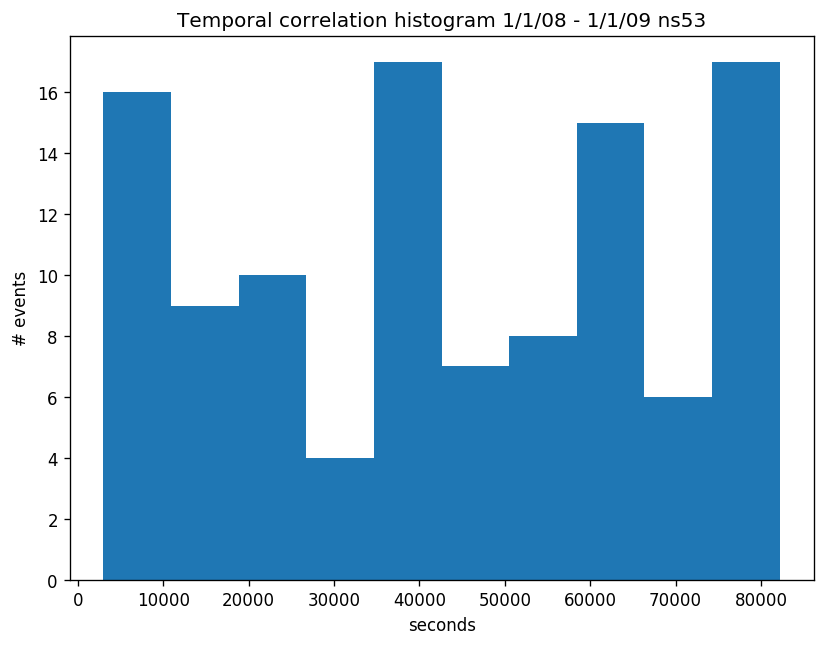

In [7]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    delta_times_seconds.append(tdelta.seconds);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
plt.title('Temporal correlation histogram 1/1/08 - 1/1/09 ns53')
plt.xlabel('seconds')
plt.ylabel('# events')
plt.hist(delta_times_seconds)
plt.show()